In [1]:
# Import libraries: 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Optimization problem with (x,y) pairs where x represents features and y is a label:
trainExamples = [
    ((0, 2), 1), 
    ((-2, 0), 1),
    ((1, -1), -1),
]

In [3]:
# Define the feature mapping function 'phi' that returns an array of features
def phi(x): 
    return np.array(x)

In [4]:
# Initialize the weight vector with two zeros: 
def initialWeightVector(): 
    return np.zeros(2)

In [5]:
 # Define the training loss function using the Hinge loss formula:
def trainLoss(w):
   
    # It measures the error between predicted and actual labels
    return 1.0 / len(trainExamples) * sum(-phi(x) * y if 1 - w.dot(phi(x)) * y > 0 else 0 for x, y in trainExamples)


In [6]:
# Define the gradient of the training loss function:

def gradientTrainLoss(w):
    return 1.0 / len(trainExamples) * sum(max(1 - w.dot(phi(x)) * y, 0) for x, y in trainExamples) 



In [9]:
# Optimization algorithm
num_iters = 750

def gradientDescent(F, gradientF, initialWeightVector):
    w = initialWeightVector()             # Initialize the weight vector 'w' using the initialWeightVector function
    eta = 0.1                             # Set the learning rate 'eta' for gradient descent
    
    # Lists to store the values for plotting
    loss_values = []
    weight_vectors = []
    
    for t in range(num_iters):                  # Perform 500 iterations of gradient descent
        value = F(w)                      # Calculate the value of the loss function using the current weight vector 'w'
        gradient = gradientF(w)           # Calculate the gradient of the loss function at 'w'
        w = w - eta * gradient            # Update the weight vector 'w' using gradient descent
        
        # Append values for plotting
        loss_values.append(value)
        weight_vectors.append(w)
        
        print(f'iteration {t}: w = {w}, F(w) = {value}, gradientF = {gradient}')
    
    # Plot the loss function value over iterations
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_iters), loss_values)
    plt.xlabel('Iteration')
    plt.ylabel('F(w)')
    plt.title('Loss Function Value over Iterations')
    plt.show()
    
    # Plot the weight vector components over iterations
    weight_vectors = np.array(weight_vectors)  # Convert to NumPy array for easy indexing
    num_components = weight_vectors.shape[1]
    plt.figure(figsize=(10, 5))
    for i in range(num_components):
        plt.plot(range(num_iters), weight_vectors[:, i], label=f'w[{i}]')
    plt.xlabel('Iteration')
    plt.ylabel('Weight Vector Component')
    plt.legend()
    plt.title('Weight Vector Components over Iterations')
    plt.show()

iteration 0: w = [-0.1 -0.1], F(w) = [ 1. -1.], gradientF = 1.0
iteration 1: w = [-0.2 -0.2], F(w) = [ 1. -1.], gradientF = 1.0
iteration 2: w = [-0.3 -0.3], F(w) = [ 1. -1.], gradientF = 1.0
iteration 3: w = [-0.4 -0.4], F(w) = [ 1. -1.], gradientF = 1.0
iteration 4: w = [-0.5 -0.5], F(w) = [ 1. -1.], gradientF = 1.0
iteration 5: w = [-0.6 -0.6], F(w) = [ 0.33333333 -1.        ], gradientF = 1.0
iteration 6: w = [-0.70666667 -0.70666667], F(w) = [ 0.33333333 -1.        ], gradientF = 1.0666666666666667
iteration 7: w = [-0.82044444 -0.82044444], F(w) = [ 0.33333333 -1.        ], gradientF = 1.1377777777777776
iteration 8: w = [-0.94180741 -0.94180741], F(w) = [ 0.33333333 -1.        ], gradientF = 1.2136296296296296
iteration 9: w = [-1.07126123 -1.07126123], F(w) = [ 0.33333333 -1.        ], gradientF = 1.2945382716049383
iteration 10: w = [-1.20934532 -1.20934532], F(w) = [ 0.33333333 -1.        ], gradientF = 1.3808408230452676
iteration 11: w = [-1.356635 -1.356635], F(w) = [ 0.33

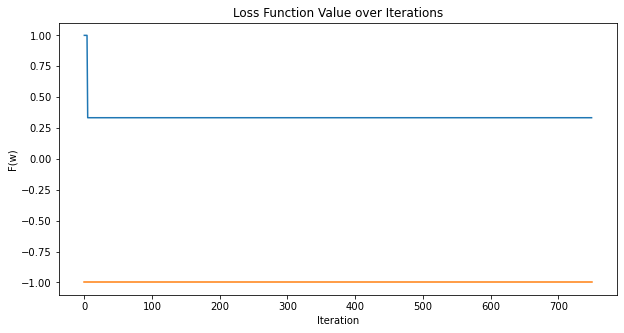

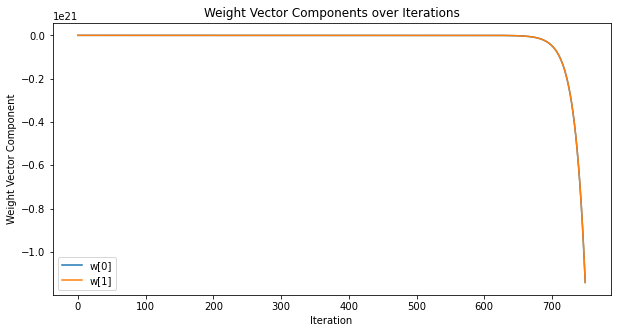

In [10]:
# Call the gradientDescent function with the defined training loss and gradient functions,along with the initial weight vector
gradientDescent(trainLoss, gradientTrainLoss, initialWeightVector)
